# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 37155 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 37155) |            | Elapsed Time: 0:00:03 ETA:  1 day, 14:53:24

  0% (  114 of 37155) |                    | Elapsed Time: 0:00:04 ETA:  0:05:26

  0% (  223 of 37155) |                    | Elapsed Time: 0:00:05 ETA:  0:05:30

  0% (  331 of 37155) |                    | Elapsed Time: 0:00:06 ETA:  0:05:32

  1% (  440 of 37155) |                    | Elapsed Time: 0:00:07 ETA:  0:05:32

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:08 ETA:  0:05:31

  1% (  577 of 37155) |                    | Elapsed Time: 0:00:09 ETA:  0:05:29

  1% (  693 of 37155) |                    | Elapsed Time: 0:00:10 ETA:  0:05:25

  2% (  811 of 37155) |                    | Elapsed Time: 0:00:11 ETA:  0:05:21

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:12 ETA:  0:05:19

  2% ( 1038 of 37155) |                    | Elapsed Time: 0:00:13 ETA:  0:05:18

  3% ( 1119 of 37155) |                    | Elapsed Time: 0:00:14 ETA:  0:05:29

  3% ( 1237 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:05:24

  3% ( 1343 of 37155) |                    | Elapsed Time: 0:00:16 ETA:  0:05:24

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:16 ETA:  0:05:27

  4% ( 1499 of 37155) |                    | Elapsed Time: 0:00:17 ETA:  0:05:31

  4% ( 1611 of 37155) |                    | Elapsed Time: 0:00:18 ETA:  0:05:32

  4% ( 1720 of 37155) |                    | Elapsed Time: 0:00:19 ETA:  0:05:34

  4% ( 1814 of 37155) |                    | Elapsed Time: 0:00:20 ETA:  0:05:38

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:21 ETA:  0:05:45

  5% ( 1951 of 37155) |#                   | Elapsed Time: 0:00:22 ETA:  0:05:39

  5% ( 2045 of 37155) |#                   | Elapsed Time: 0:00:23 ETA:  0:05:49

  5% ( 2149 of 37155) |#                   | Elapsed Time: 0:00:24 ETA:  0:05:49

  6% ( 2264 of 37155) |#                   | Elapsed Time: 0:00:25 ETA:  0:05:41

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:00:25 ETA:  0:05:37

  6% ( 2450 of 37155) |#                   | Elapsed Time: 0:00:26 ETA:  0:05:30

  6% ( 2576 of 37155) |#                   | Elapsed Time: 0:00:27 ETA:  0:05:22

  7% ( 2704 of 37155) |#                   | Elapsed Time: 0:00:28 ETA:  0:05:07

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:56

  7% ( 2918 of 37155) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:43

  8% ( 3022 of 37155) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:38

  8% ( 3122 of 37155) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:48

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:00:33 ETA:  0:04:49

  9% ( 3368 of 37155) |#                   | Elapsed Time: 0:00:34 ETA:  0:04:52

  9% ( 3457 of 37155) |#                   | Elapsed Time: 0:00:35 ETA:  0:05:05

  9% ( 3532 of 37155) |#                   | Elapsed Time: 0:00:36 ETA:  0:05:26

  9% ( 3615 of 37155) |#                   | Elapsed Time: 0:00:37 ETA:  0:05:40

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:00:38 ETA:  0:06:01

 10% ( 3843 of 37155) |##                  | Elapsed Time: 0:00:39 ETA:  0:05:32

 10% ( 3950 of 37155) |##                  | Elapsed Time: 0:00:40 ETA:  0:05:35

 10% ( 4048 of 37155) |##                  | Elapsed Time: 0:00:41 ETA:  0:05:36

 11% ( 4142 of 37155) |##                  | Elapsed Time: 0:00:42 ETA:  0:05:46

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:42

 11% ( 4280 of 37155) |##                  | Elapsed Time: 0:00:44 ETA:  0:05:28

 11% ( 4389 of 37155) |##                  | Elapsed Time: 0:00:45 ETA:  0:05:15

 12% ( 4499 of 37155) |##                  | Elapsed Time: 0:00:46 ETA:  0:05:06

 12% ( 4607 of 37155) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:05

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:13

 12% ( 4757 of 37155) |##                  | Elapsed Time: 0:00:48 ETA:  0:05:10

 13% ( 4867 of 37155) |##                  | Elapsed Time: 0:00:49 ETA:  0:05:04

 13% ( 4980 of 37155) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:54

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:45

 14% ( 5222 of 37155) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:42

 14% ( 5335 of 37155) |##                  | Elapsed Time: 0:00:53 ETA:  0:04:40

 14% ( 5447 of 37155) |##                  | Elapsed Time: 0:00:54 ETA:  0:04:38

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:00:55 ETA:  0:04:36

 15% ( 5638 of 37155) |###                 | Elapsed Time: 0:00:56 ETA:  0:04:55

 15% ( 5751 of 37155) |###                 | Elapsed Time: 0:00:57 ETA:  0:04:54

 15% ( 5864 of 37155) |###                 | Elapsed Time: 0:00:58 ETA:  0:04:53

 16% ( 5977 of 37155) |###                 | Elapsed Time: 0:00:59 ETA:  0:04:49

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:00 ETA:  0:04:50

 16% ( 6149 of 37155) |###                 | Elapsed Time: 0:01:01 ETA:  0:04:50

 16% ( 6269 of 37155) |###                 | Elapsed Time: 0:01:02 ETA:  0:04:46

 17% ( 6389 of 37155) |###                 | Elapsed Time: 0:01:03 ETA:  0:04:42

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:04 ETA:  0:04:38

 17% ( 6619 of 37155) |###                 | Elapsed Time: 0:01:05 ETA:  0:04:19

 18% ( 6740 of 37155) |###                 | Elapsed Time: 0:01:06 ETA:  0:04:15

 18% ( 6860 of 37155) |###                 | Elapsed Time: 0:01:07 ETA:  0:04:12

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:08 ETA:  0:04:10

 19% ( 7088 of 37155) |###                 | Elapsed Time: 0:01:09 ETA:  0:04:07

 19% ( 7211 of 37155) |###                 | Elapsed Time: 0:01:10 ETA:  0:04:02

 19% ( 7332 of 37155) |###                 | Elapsed Time: 0:01:11 ETA:  0:04:01

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:01:12 ETA:  0:04:00

 20% ( 7553 of 37155) |####                | Elapsed Time: 0:01:13 ETA:  0:03:57

 20% ( 7674 of 37155) |####                | Elapsed Time: 0:01:14 ETA:  0:03:54

 20% ( 7797 of 37155) |####                | Elapsed Time: 0:01:15 ETA:  0:03:53

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:01:16 ETA:  0:03:52

 21% ( 8017 of 37155) |####                | Elapsed Time: 0:01:17 ETA:  0:03:49

 21% ( 8140 of 37155) |####                | Elapsed Time: 0:01:18 ETA:  0:03:48

 22% ( 8265 of 37155) |####                | Elapsed Time: 0:01:19 ETA:  0:03:46

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:01:19 ETA:  0:03:45

 22% ( 8481 of 37155) |####                | Elapsed Time: 0:01:20 ETA:  0:03:44

 23% ( 8601 of 37155) |####                | Elapsed Time: 0:01:21 ETA:  0:03:44

 23% ( 8719 of 37155) |####                | Elapsed Time: 0:01:22 ETA:  0:03:43

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:01:23 ETA:  0:03:45

 24% ( 8942 of 37155) |####                | Elapsed Time: 0:01:24 ETA:  0:03:45

 24% ( 9033 of 37155) |####                | Elapsed Time: 0:01:25 ETA:  0:03:53

 24% ( 9077 of 37155) |####                | Elapsed Time: 0:01:26 ETA:  0:04:19

 24% ( 9163 of 37155) |####                | Elapsed Time: 0:01:27 ETA:  0:04:34

 24% ( 9249 of 37155) |####                | Elapsed Time: 0:01:28 ETA:  0:04:46

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:01:29 ETA:  0:04:58

 25% ( 9374 of 37155) |#####               | Elapsed Time: 0:01:30 ETA:  0:05:15

 25% ( 9465 of 37155) |#####               | Elapsed Time: 0:01:31 ETA:  0:05:29

 25% ( 9553 of 37155) |#####               | Elapsed Time: 0:01:32 ETA:  0:05:41

 26% ( 9666 of 37155) |#####               | Elapsed Time: 0:01:33 ETA:  0:05:43

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:01:34 ETA:  0:05:31

 26% ( 9865 of 37155) |#####               | Elapsed Time: 0:01:35 ETA:  0:04:54

 26% ( 9977 of 37155) |#####               | Elapsed Time: 0:01:36 ETA:  0:04:40

 27% (10091 of 37155) |#####               | Elapsed Time: 0:01:37 ETA:  0:04:27

 27% (10218 of 37155) |#####               | Elapsed Time: 0:01:38 ETA:  0:04:10

 27% (10333 of 37155) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:59

 28% (10446 of 37155) |#####               | Elapsed Time: 0:01:40 ETA:  0:03:49

 28% (10551 of 37155) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:51

 28% (10649 of 37155) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:56

 28% (10683 of 37155) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:58

 29% (10782 of 37155) |#####               | Elapsed Time: 0:01:43 ETA:  0:04:02

 29% (10876 of 37155) |#####               | Elapsed Time: 0:01:44 ETA:  0:04:10

 29% (10983 of 37155) |#####               | Elapsed Time: 0:01:45 ETA:  0:04:12

 29% (11075 of 37155) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:17

 30% (11147 of 37155) |######              | Elapsed Time: 0:01:47 ETA:  0:04:26

 30% (11241 of 37155) |######              | Elapsed Time: 0:01:48 ETA:  0:04:34

 30% (11342 of 37155) |######              | Elapsed Time: 0:01:49 ETA:  0:04:35

 30% (11452 of 37155) |######              | Elapsed Time: 0:01:50 ETA:  0:04:29

 31% (11569 of 37155) |######              | Elapsed Time: 0:01:51 ETA:  0:04:19

 31% (11611 of 37155) |######              | Elapsed Time: 0:01:51 ETA:  0:04:16

 31% (11728 of 37155) |######              | Elapsed Time: 0:01:52 ETA:  0:04:04

 31% (11846 of 37155) |######              | Elapsed Time: 0:01:53 ETA:  0:03:59

 32% (11963 of 37155) |######              | Elapsed Time: 0:01:54 ETA:  0:03:48

 32% (12076 of 37155) |######              | Elapsed Time: 0:01:55 ETA:  0:03:37

 32% (12189 of 37155) |######              | Elapsed Time: 0:01:56 ETA:  0:03:29

 33% (12290 of 37155) |######              | Elapsed Time: 0:01:57 ETA:  0:03:28

 33% (12390 of 37155) |######              | Elapsed Time: 0:01:58 ETA:  0:03:30

 33% (12494 of 37155) |######              | Elapsed Time: 0:01:59 ETA:  0:03:34

 33% (12540 of 37155) |######              | Elapsed Time: 0:02:00 ETA:  0:03:33

 34% (12648 of 37155) |######              | Elapsed Time: 0:02:01 ETA:  0:03:36

 34% (12762 of 37155) |######              | Elapsed Time: 0:02:02 ETA:  0:03:59

 34% (12866 of 37155) |######              | Elapsed Time: 0:02:03 ETA:  0:04:04

 34% (12969 of 37155) |######              | Elapsed Time: 0:02:04 ETA:  0:04:10

 35% (13005 of 37155) |#######             | Elapsed Time: 0:02:05 ETA:  0:04:16

 35% (13106 of 37155) |#######             | Elapsed Time: 0:02:06 ETA:  0:04:15

 35% (13220 of 37155) |#######             | Elapsed Time: 0:02:07 ETA:  0:04:07

 35% (13322 of 37155) |#######             | Elapsed Time: 0:02:08 ETA:  0:04:07

 36% (13426 of 37155) |#######             | Elapsed Time: 0:02:09 ETA:  0:04:07

 36% (13469 of 37155) |#######             | Elapsed Time: 0:02:09 ETA:  0:04:08

 36% (13573 of 37155) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:45

 36% (13689 of 37155) |#######             | Elapsed Time: 0:02:11 ETA:  0:03:39

 37% (13801 of 37155) |#######             | Elapsed Time: 0:02:12 ETA:  0:03:34

 37% (13934 of 37155) |#######             | Elapsed Time: 0:02:13 ETA:  0:03:21

 37% (14058 of 37155) |#######             | Elapsed Time: 0:02:14 ETA:  0:03:16

 38% (14176 of 37155) |#######             | Elapsed Time: 0:02:15 ETA:  0:03:10

 38% (14260 of 37155) |#######             | Elapsed Time: 0:02:16 ETA:  0:03:17

 38% (14348 of 37155) |#######             | Elapsed Time: 0:02:17 ETA:  0:03:26

 38% (14398 of 37155) |#######             | Elapsed Time: 0:02:18 ETA:  0:03:29

 38% (14489 of 37155) |#######             | Elapsed Time: 0:02:19 ETA:  0:03:39

 39% (14599 of 37155) |#######             | Elapsed Time: 0:02:20 ETA:  0:03:39

 39% (14712 of 37155) |#######             | Elapsed Time: 0:02:21 ETA:  0:03:43

 39% (14814 of 37155) |#######             | Elapsed Time: 0:02:22 ETA:  0:03:43

 40% (14862 of 37155) |########            | Elapsed Time: 0:02:22 ETA:  0:03:54

 40% (14954 of 37155) |########            | Elapsed Time: 0:02:23 ETA:  0:04:04

 40% (15064 of 37155) |########            | Elapsed Time: 0:02:24 ETA:  0:03:50

 40% (15181 of 37155) |########            | Elapsed Time: 0:02:25 ETA:  0:03:36

 41% (15327 of 37155) |########            | Elapsed Time: 0:02:26 ETA:  0:03:13

 41% (15453 of 37155) |########            | Elapsed Time: 0:02:27 ETA:  0:03:06

 41% (15549 of 37155) |########            | Elapsed Time: 0:02:28 ETA:  0:03:12

 42% (15632 of 37155) |########            | Elapsed Time: 0:02:29 ETA:  0:03:18

 42% (15724 of 37155) |########            | Elapsed Time: 0:02:31 ETA:  0:03:21

 42% (15791 of 37155) |########            | Elapsed Time: 0:02:31 ETA:  0:03:17

 42% (15898 of 37155) |########            | Elapsed Time: 0:02:32 ETA:  0:03:17

 43% (16014 of 37155) |########            | Elapsed Time: 0:02:33 ETA:  0:03:17

 43% (16133 of 37155) |########            | Elapsed Time: 0:02:34 ETA:  0:03:19

 43% (16256 of 37155) |########            | Elapsed Time: 0:02:35 ETA:  0:03:25

 43% (16348 of 37155) |########            | Elapsed Time: 0:02:36 ETA:  0:03:25

 44% (16442 of 37155) |########            | Elapsed Time: 0:02:37 ETA:  0:03:20

 44% (16545 of 37155) |########            | Elapsed Time: 0:02:38 ETA:  0:03:14

 44% (16652 of 37155) |########            | Elapsed Time: 0:02:39 ETA:  0:03:10

 45% (16720 of 37155) |#########           | Elapsed Time: 0:02:40 ETA:  0:03:10

 45% (16815 of 37155) |#########           | Elapsed Time: 0:02:41 ETA:  0:03:18

 45% (16913 of 37155) |#########           | Elapsed Time: 0:02:42 ETA:  0:03:27

 45% (17020 of 37155) |#########           | Elapsed Time: 0:02:43 ETA:  0:03:30

 46% (17126 of 37155) |#########           | Elapsed Time: 0:02:44 ETA:  0:03:27

 46% (17185 of 37155) |#########           | Elapsed Time: 0:02:45 ETA:  0:03:55

 46% (17276 of 37155) |#########           | Elapsed Time: 0:02:46 ETA:  0:04:00

 46% (17377 of 37155) |#########           | Elapsed Time: 0:02:47 ETA:  0:04:02

 47% (17478 of 37155) |#########           | Elapsed Time: 0:02:48 ETA:  0:04:00

 47% (17583 of 37155) |#########           | Elapsed Time: 0:02:49 ETA:  0:03:54

 47% (17649 of 37155) |#########           | Elapsed Time: 0:02:50 ETA:  0:03:58

 47% (17742 of 37155) |#########           | Elapsed Time: 0:02:51 ETA:  0:04:04

 48% (17843 of 37155) |#########           | Elapsed Time: 0:02:52 ETA:  0:04:06

 48% (17971 of 37155) |#########           | Elapsed Time: 0:02:53 ETA:  0:03:12

 48% (18114 of 37155) |#########           | Elapsed Time: 0:02:54 ETA:  0:02:57

 49% (18245 of 37155) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:44

 49% (18362 of 37155) |#########           | Elapsed Time: 0:02:56 ETA:  0:02:37

 49% (18476 of 37155) |#########           | Elapsed Time: 0:02:57 ETA:  0:02:33

 50% (18578 of 37155) |##########          | Elapsed Time: 0:02:58 ETA:  0:02:26

 50% (18705 of 37155) |##########          | Elapsed Time: 0:02:59 ETA:  0:02:14

 50% (18828 of 37155) |##########          | Elapsed Time: 0:03:00 ETA:  0:02:06

 50% (18929 of 37155) |##########          | Elapsed Time: 0:03:01 ETA:  0:02:14

 51% (19015 of 37155) |##########          | Elapsed Time: 0:03:02 ETA:  0:02:24

 51% (19042 of 37155) |##########          | Elapsed Time: 0:03:02 ETA:  0:02:26

 51% (19146 of 37155) |##########          | Elapsed Time: 0:03:03 ETA:  0:02:35

 51% (19262 of 37155) |##########          | Elapsed Time: 0:03:05 ETA:  0:02:34

 52% (19382 of 37155) |##########          | Elapsed Time: 0:03:06 ETA:  0:02:31

 52% (19507 of 37155) |##########          | Elapsed Time: 0:03:07 ETA:  0:02:37

 52% (19603 of 37155) |##########          | Elapsed Time: 0:03:08 ETA:  0:02:48

 53% (19699 of 37155) |##########          | Elapsed Time: 0:03:09 ETA:  0:02:50

 53% (19811 of 37155) |##########          | Elapsed Time: 0:03:10 ETA:  0:02:37

 53% (19932 of 37155) |##########          | Elapsed Time: 0:03:11 ETA:  0:02:30

 53% (19971 of 37155) |##########          | Elapsed Time: 0:03:11 ETA:  0:02:25

 54% (20094 of 37155) |##########          | Elapsed Time: 0:03:12 ETA:  0:02:21

 54% (20210 of 37155) |##########          | Elapsed Time: 0:03:13 ETA:  0:02:22

 54% (20320 of 37155) |##########          | Elapsed Time: 0:03:14 ETA:  0:02:22

 54% (20391 of 37155) |##########          | Elapsed Time: 0:03:15 ETA:  0:02:35

 55% (20436 of 37155) |###########         | Elapsed Time: 0:03:15 ETA:  0:02:33

 55% (20535 of 37155) |###########         | Elapsed Time: 0:03:16 ETA:  0:02:31

 55% (20612 of 37155) |###########         | Elapsed Time: 0:03:18 ETA:  0:02:45

 55% (20668 of 37155) |###########         | Elapsed Time: 0:03:19 ETA:  0:03:16

 55% (20744 of 37155) |###########         | Elapsed Time: 0:03:20 ETA:  0:03:30

 56% (20836 of 37155) |###########         | Elapsed Time: 0:03:21 ETA:  0:03:47

 56% (20900 of 37155) |###########         | Elapsed Time: 0:03:21 ETA:  0:04:07

 56% (21010 of 37155) |###########         | Elapsed Time: 0:03:22 ETA:  0:04:06

 56% (21122 of 37155) |###########         | Elapsed Time: 0:03:23 ETA:  0:03:40

 57% (21231 of 37155) |###########         | Elapsed Time: 0:03:24 ETA:  0:03:29

 57% (21365 of 37155) |###########         | Elapsed Time: 0:03:26 ETA:  0:03:10

 57% (21464 of 37155) |###########         | Elapsed Time: 0:03:27 ETA:  0:02:48

 58% (21584 of 37155) |###########         | Elapsed Time: 0:03:28 ETA:  0:02:27

 58% (21718 of 37155) |###########         | Elapsed Time: 0:03:29 ETA:  0:02:09

 58% (21829 of 37155) |###########         | Elapsed Time: 0:03:30 ETA:  0:01:57

 59% (21934 of 37155) |###########         | Elapsed Time: 0:03:31 ETA:  0:01:58

 59% (22058 of 37155) |###########         | Elapsed Time: 0:03:32 ETA:  0:01:52

 59% (22153 of 37155) |###########         | Elapsed Time: 0:03:33 ETA:  0:01:56

 60% (22293 of 37155) |############        | Elapsed Time: 0:03:34 ETA:  0:01:53

 60% (22407 of 37155) |############        | Elapsed Time: 0:03:35 ETA:  0:01:47

 60% (22518 of 37155) |############        | Elapsed Time: 0:03:36 ETA:  0:01:49

 60% (22610 of 37155) |############        | Elapsed Time: 0:03:37 ETA:  0:02:03

 61% (22668 of 37155) |############        | Elapsed Time: 0:03:38 ETA:  0:02:43

 61% (22758 of 37155) |############        | Elapsed Time: 0:03:39 ETA:  0:02:46

 61% (22872 of 37155) |############        | Elapsed Time: 0:03:40 ETA:  0:02:50

 61% (22950 of 37155) |############        | Elapsed Time: 0:03:41 ETA:  0:02:57

 62% (23041 of 37155) |############        | Elapsed Time: 0:03:42 ETA:  0:03:09

 62% (23145 of 37155) |############        | Elapsed Time: 0:03:43 ETA:  0:03:05

 62% (23222 of 37155) |############        | Elapsed Time: 0:03:44 ETA:  0:03:15

 62% (23334 of 37155) |############        | Elapsed Time: 0:03:45 ETA:  0:03:13

 63% (23448 of 37155) |############        | Elapsed Time: 0:03:46 ETA:  0:03:02

 63% (23554 of 37155) |############        | Elapsed Time: 0:03:47 ETA:  0:02:21

 63% (23687 of 37155) |############        | Elapsed Time: 0:03:48 ETA:  0:02:18

 64% (23806 of 37155) |############        | Elapsed Time: 0:03:49 ETA:  0:01:59

 64% (23915 of 37155) |############        | Elapsed Time: 0:03:50 ETA:  0:01:51

 64% (23994 of 37155) |############        | Elapsed Time: 0:03:51 ETA:  0:02:00

 64% (24073 of 37155) |############        | Elapsed Time: 0:03:52 ETA:  0:02:06

 65% (24151 of 37155) |#############       | Elapsed Time: 0:03:53 ETA:  0:02:12

 65% (24273 of 37155) |#############       | Elapsed Time: 0:03:54 ETA:  0:02:07

 65% (24378 of 37155) |#############       | Elapsed Time: 0:03:55 ETA:  0:02:07

 65% (24485 of 37155) |#############       | Elapsed Time: 0:03:56 ETA:  0:02:09

 66% (24616 of 37155) |#############       | Elapsed Time: 0:03:57 ETA:  0:02:08

 66% (24733 of 37155) |#############       | Elapsed Time: 0:03:58 ETA:  0:02:03

 66% (24847 of 37155) |#############       | Elapsed Time: 0:03:59 ETA:  0:01:47

 67% (24947 of 37155) |#############       | Elapsed Time: 0:04:00 ETA:  0:01:38

 67% (25054 of 37155) |#############       | Elapsed Time: 0:04:01 ETA:  0:01:33

 67% (25080 of 37155) |#############       | Elapsed Time: 0:04:01 ETA:  0:01:40

 67% (25199 of 37155) |#############       | Elapsed Time: 0:04:02 ETA:  0:01:33

 68% (25325 of 37155) |#############       | Elapsed Time: 0:04:03 ETA:  0:01:24

 68% (25449 of 37155) |#############       | Elapsed Time: 0:04:04 ETA:  0:01:21

 68% (25545 of 37155) |#############       | Elapsed Time: 0:04:05 ETA:  0:01:20

 69% (25645 of 37155) |#############       | Elapsed Time: 0:04:06 ETA:  0:01:25

 69% (25740 of 37155) |#############       | Elapsed Time: 0:04:07 ETA:  0:01:31

 69% (25870 of 37155) |#############       | Elapsed Time: 0:04:08 ETA:  0:01:19

 70% (26009 of 37155) |##############      | Elapsed Time: 0:04:10 ETA:  0:01:12

 70% (26109 of 37155) |##############      | Elapsed Time: 0:04:11 ETA:  0:01:18

 70% (26211 of 37155) |##############      | Elapsed Time: 0:04:12 ETA:  0:01:25

 70% (26329 of 37155) |##############      | Elapsed Time: 0:04:13 ETA:  0:01:26

 71% (26441 of 37155) |##############      | Elapsed Time: 0:04:14 ETA:  0:01:26

 71% (26473 of 37155) |##############      | Elapsed Time: 0:04:14 ETA:  0:01:24

 71% (26582 of 37155) |##############      | Elapsed Time: 0:04:15 ETA:  0:01:17

 71% (26690 of 37155) |##############      | Elapsed Time: 0:04:16 ETA:  0:01:25

 72% (26793 of 37155) |##############      | Elapsed Time: 0:04:17 ETA:  0:01:31

 72% (26901 of 37155) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:30

 72% (26938 of 37155) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:26

 72% (27048 of 37155) |##############      | Elapsed Time: 0:04:19 ETA:  0:01:22

 73% (27170 of 37155) |##############      | Elapsed Time: 0:04:20 ETA:  0:01:19

 73% (27285 of 37155) |##############      | Elapsed Time: 0:04:21 ETA:  0:01:17

 73% (27402 of 37155) |##############      | Elapsed Time: 0:04:22 ETA:  0:01:14

 74% (27515 of 37155) |##############      | Elapsed Time: 0:04:23 ETA:  0:01:11

 74% (27622 of 37155) |##############      | Elapsed Time: 0:04:24 ETA:  0:01:09

 74% (27729 of 37155) |##############      | Elapsed Time: 0:04:25 ETA:  0:01:08

 75% (27867 of 37155) |###############     | Elapsed Time: 0:04:26 ETA:  0:01:03

 75% (27972 of 37155) |###############     | Elapsed Time: 0:04:27 ETA:  0:01:09

 75% (28081 of 37155) |###############     | Elapsed Time: 0:04:29 ETA:  0:01:10

 75% (28196 of 37155) |###############     | Elapsed Time: 0:04:30 ETA:  0:01:07

 76% (28306 of 37155) |###############     | Elapsed Time: 0:04:31 ETA:  0:01:06

 76% (28331 of 37155) |###############     | Elapsed Time: 0:04:31 ETA:  0:01:10

 76% (28456 of 37155) |###############     | Elapsed Time: 0:04:32 ETA:  0:01:01

 76% (28564 of 37155) |###############     | Elapsed Time: 0:04:33 ETA:  0:01:00

 77% (28683 of 37155) |###############     | Elapsed Time: 0:04:34 ETA:  0:01:00

 77% (28773 of 37155) |###############     | Elapsed Time: 0:04:35 ETA:  0:01:06

 77% (28796 of 37155) |###############     | Elapsed Time: 0:04:35 ETA:  0:01:04

 77% (28912 of 37155) |###############     | Elapsed Time: 0:04:36 ETA:  0:01:01

 78% (29020 of 37155) |###############     | Elapsed Time: 0:04:37 ETA:  0:01:02

 78% (29125 of 37155) |###############     | Elapsed Time: 0:04:38 ETA:  0:01:04

 78% (29228 of 37155) |###############     | Elapsed Time: 0:04:39 ETA:  0:01:01

 78% (29260 of 37155) |###############     | Elapsed Time: 0:04:39 ETA:  0:01:06

 78% (29313 of 37155) |###############     | Elapsed Time: 0:04:41 ETA:  0:01:58

 79% (29424 of 37155) |###############     | Elapsed Time: 0:04:42 ETA:  0:02:02

 79% (29528 of 37155) |###############     | Elapsed Time: 0:04:43 ETA:  0:01:53

 79% (29632 of 37155) |###############     | Elapsed Time: 0:04:44 ETA:  0:01:49

 80% (29724 of 37155) |################    | Elapsed Time: 0:04:45 ETA:  0:01:59

 80% (29824 of 37155) |################    | Elapsed Time: 0:04:46 ETA:  0:02:02

 80% (29928 of 37155) |################    | Elapsed Time: 0:04:47 ETA:  0:02:01

 80% (30036 of 37155) |################    | Elapsed Time: 0:04:48 ETA:  0:01:58

 81% (30144 of 37155) |################    | Elapsed Time: 0:04:49 ETA:  0:01:53

 81% (30189 of 37155) |################    | Elapsed Time: 0:04:49 ETA:  0:01:11

 81% (30297 of 37155) |################    | Elapsed Time: 0:04:50 ETA:  0:01:11

 81% (30403 of 37155) |################    | Elapsed Time: 0:04:51 ETA:  0:01:09

 82% (30509 of 37155) |################    | Elapsed Time: 0:04:52 ETA:  0:01:07

 82% (30616 of 37155) |################    | Elapsed Time: 0:04:53 ETA:  0:01:01

 82% (30653 of 37155) |################    | Elapsed Time: 0:04:54 ETA:  0:00:58

 82% (30762 of 37155) |################    | Elapsed Time: 0:04:55 ETA:  0:00:55

 83% (30863 of 37155) |################    | Elapsed Time: 0:04:56 ETA:  0:00:57

 83% (30971 of 37155) |################    | Elapsed Time: 0:04:57 ETA:  0:00:56

 83% (31077 of 37155) |################    | Elapsed Time: 0:04:58 ETA:  0:00:52

 83% (31118 of 37155) |################    | Elapsed Time: 0:04:58 ETA:  0:00:54

 84% (31231 of 37155) |################    | Elapsed Time: 0:04:59 ETA:  0:00:50

 84% (31327 of 37155) |################    | Elapsed Time: 0:05:00 ETA:  0:00:53

 84% (31440 of 37155) |################    | Elapsed Time: 0:05:01 ETA:  0:00:50

 84% (31546 of 37155) |################    | Elapsed Time: 0:05:02 ETA:  0:00:53

 85% (31582 of 37155) |#################   | Elapsed Time: 0:05:03 ETA:  0:00:54

 85% (31686 of 37155) |#################   | Elapsed Time: 0:05:04 ETA:  0:00:52

 85% (31775 of 37155) |#################   | Elapsed Time: 0:05:05 ETA:  0:00:59

 85% (31870 of 37155) |#################   | Elapsed Time: 0:05:06 ETA:  0:01:04

 86% (31981 of 37155) |#################   | Elapsed Time: 0:05:07 ETA:  0:00:58

 86% (32047 of 37155) |#################   | Elapsed Time: 0:05:07 ETA:  0:01:02

 86% (32151 of 37155) |#################   | Elapsed Time: 0:05:08 ETA:  0:00:58

 86% (32260 of 37155) |#################   | Elapsed Time: 0:05:09 ETA:  0:00:59

 87% (32347 of 37155) |#################   | Elapsed Time: 0:05:10 ETA:  0:01:02

 87% (32453 of 37155) |#################   | Elapsed Time: 0:05:11 ETA:  0:00:59

 87% (32511 of 37155) |#################   | Elapsed Time: 0:05:12 ETA:  0:01:00

 87% (32613 of 37155) |#################   | Elapsed Time: 0:05:13 ETA:  0:00:53

 88% (32706 of 37155) |#################   | Elapsed Time: 0:05:14 ETA:  0:00:53

 88% (32813 of 37155) |#################   | Elapsed Time: 0:05:15 ETA:  0:00:53

 88% (32913 of 37155) |#################   | Elapsed Time: 0:05:16 ETA:  0:00:53

 88% (32976 of 37155) |#################   | Elapsed Time: 0:05:17 ETA:  0:00:51

 89% (33073 of 37155) |#################   | Elapsed Time: 0:05:18 ETA:  0:00:55

 89% (33153 of 37155) |#################   | Elapsed Time: 0:05:19 ETA:  0:00:57

 89% (33244 of 37155) |#################   | Elapsed Time: 0:05:20 ETA:  0:01:04

 89% (33345 of 37155) |#################   | Elapsed Time: 0:05:21 ETA:  0:01:02

 90% (33440 of 37155) |##################  | Elapsed Time: 0:05:22 ETA:  0:01:02

 90% (33545 of 37155) |##################  | Elapsed Time: 0:05:23 ETA:  0:00:56

 90% (33636 of 37155) |##################  | Elapsed Time: 0:05:24 ETA:  0:01:02

 90% (33738 of 37155) |##################  | Elapsed Time: 0:05:25 ETA:  0:01:00

 91% (33826 of 37155) |##################  | Elapsed Time: 0:05:26 ETA:  0:01:07

 91% (33904 of 37155) |##################  | Elapsed Time: 0:05:26 ETA:  0:01:03

 91% (33987 of 37155) |##################  | Elapsed Time: 0:05:27 ETA:  0:01:00

 91% (34086 of 37155) |##################  | Elapsed Time: 0:05:28 ETA:  0:00:55

 92% (34190 of 37155) |##################  | Elapsed Time: 0:05:29 ETA:  0:00:53

 92% (34288 of 37155) |##################  | Elapsed Time: 0:05:30 ETA:  0:00:52

 92% (34369 of 37155) |##################  | Elapsed Time: 0:05:31 ETA:  0:00:51

 92% (34478 of 37155) |##################  | Elapsed Time: 0:05:32 ETA:  0:00:42

 93% (34579 of 37155) |##################  | Elapsed Time: 0:05:33 ETA:  0:00:42

 93% (34693 of 37155) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:30

 93% (34805 of 37155) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:27

 93% (34833 of 37155) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:21

 94% (34939 of 37155) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:17

 94% (35041 of 37155) |##################  | Elapsed Time: 0:05:37 ETA:  0:00:17

 94% (35145 of 37155) |##################  | Elapsed Time: 0:05:38 ETA:  0:00:13

 94% (35241 of 37155) |##################  | Elapsed Time: 0:05:39 ETA:  0:00:17

 95% (35298 of 37155) |################### | Elapsed Time: 0:05:40 ETA:  0:00:17

 95% (35403 of 37155) |################### | Elapsed Time: 0:05:41 ETA:  0:00:14

 95% (35493 of 37155) |################### | Elapsed Time: 0:05:42 ETA:  0:00:23

 95% (35592 of 37155) |################### | Elapsed Time: 0:05:43 ETA:  0:00:28

 96% (35684 of 37155) |################### | Elapsed Time: 0:05:44 ETA:  0:00:28

 96% (35762 of 37155) |################### | Elapsed Time: 0:05:45 ETA:  0:00:31

 96% (35867 of 37155) |################### | Elapsed Time: 0:05:46 ETA:  0:00:28

 96% (35973 of 37155) |################### | Elapsed Time: 0:05:47 ETA:  0:00:27

 97% (36064 of 37155) |################### | Elapsed Time: 0:05:48 ETA:  0:00:28

 97% (36166 of 37155) |################### | Elapsed Time: 0:05:49 ETA:  0:00:29

 97% (36227 of 37155) |################### | Elapsed Time: 0:05:49 ETA:  0:00:31

 97% (36325 of 37155) |################### | Elapsed Time: 0:05:50 ETA:  0:00:26

 98% (36424 of 37155) |################### | Elapsed Time: 0:05:51 ETA:  0:00:26

 98% (36454 of 37155) |################### | Elapsed Time: 0:05:53 ETA:  0:01:25

 98% (36540 of 37155) |################### | Elapsed Time: 0:05:54 ETA:  0:01:30

 98% (36630 of 37155) |################### | Elapsed Time: 0:05:55 ETA:  0:01:38

 98% (36691 of 37155) |################### | Elapsed Time: 0:05:56 ETA:  0:01:44

 99% (36788 of 37155) |################### | Elapsed Time: 0:05:57 ETA:  0:01:39

 99% (36887 of 37155) |################### | Elapsed Time: 0:05:58 ETA:  0:01:40

 99% (36981 of 37155) |################### | Elapsed Time: 0:05:59 ETA:  0:01:38

 99% (37075 of 37155) |################### | Elapsed Time: 0:06:00 ETA:  0:01:39

100% (37155 of 37155) |####################| Elapsed Time: 0:06:01 Time: 0:06:01


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

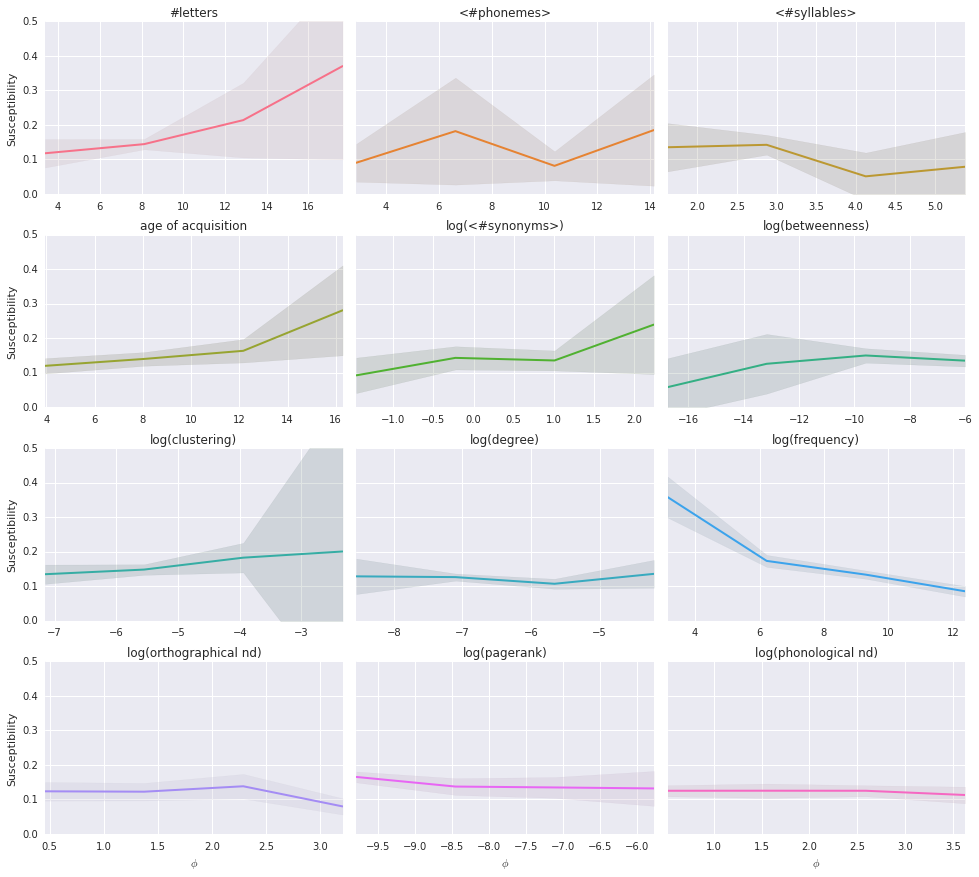

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

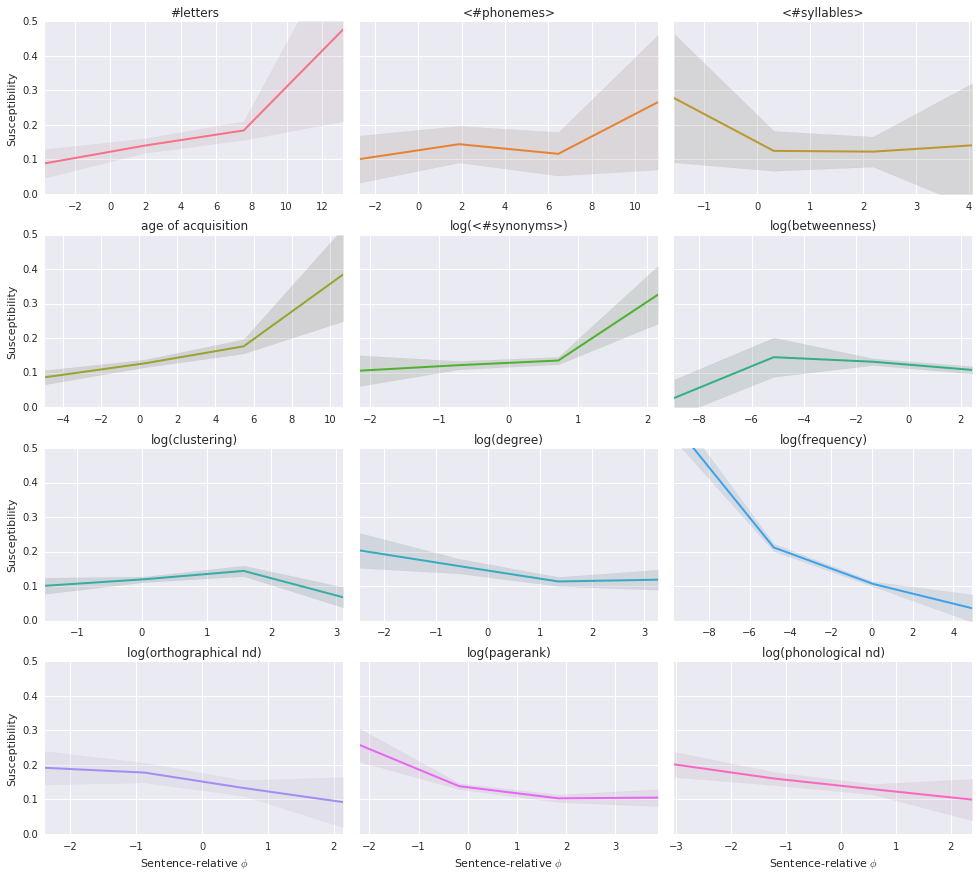

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

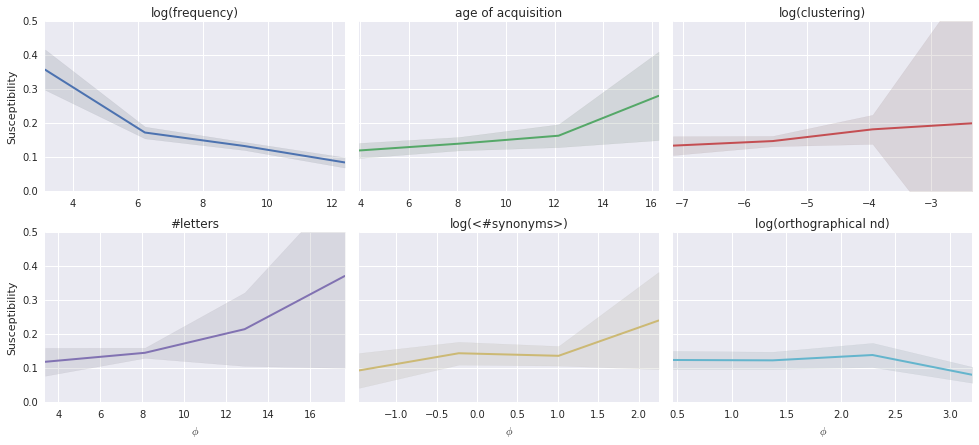

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

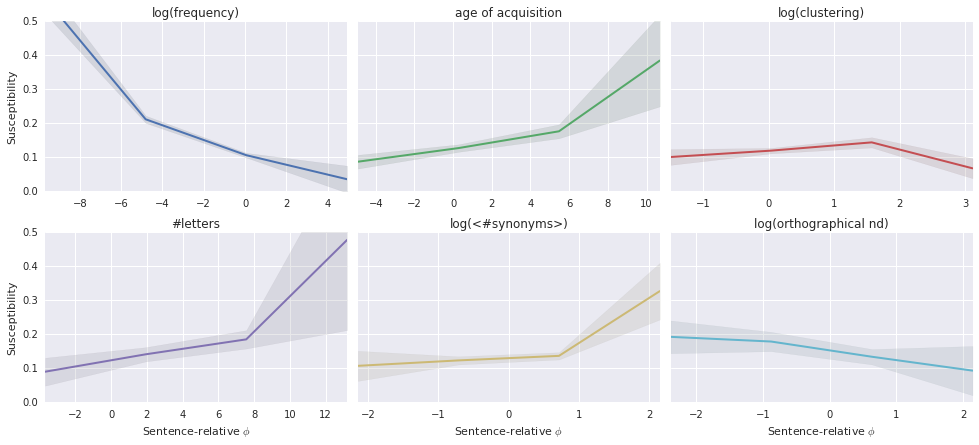

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

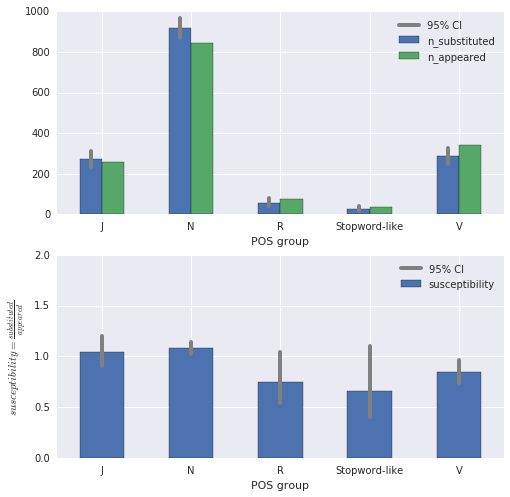

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'Stopword-like', 'V']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

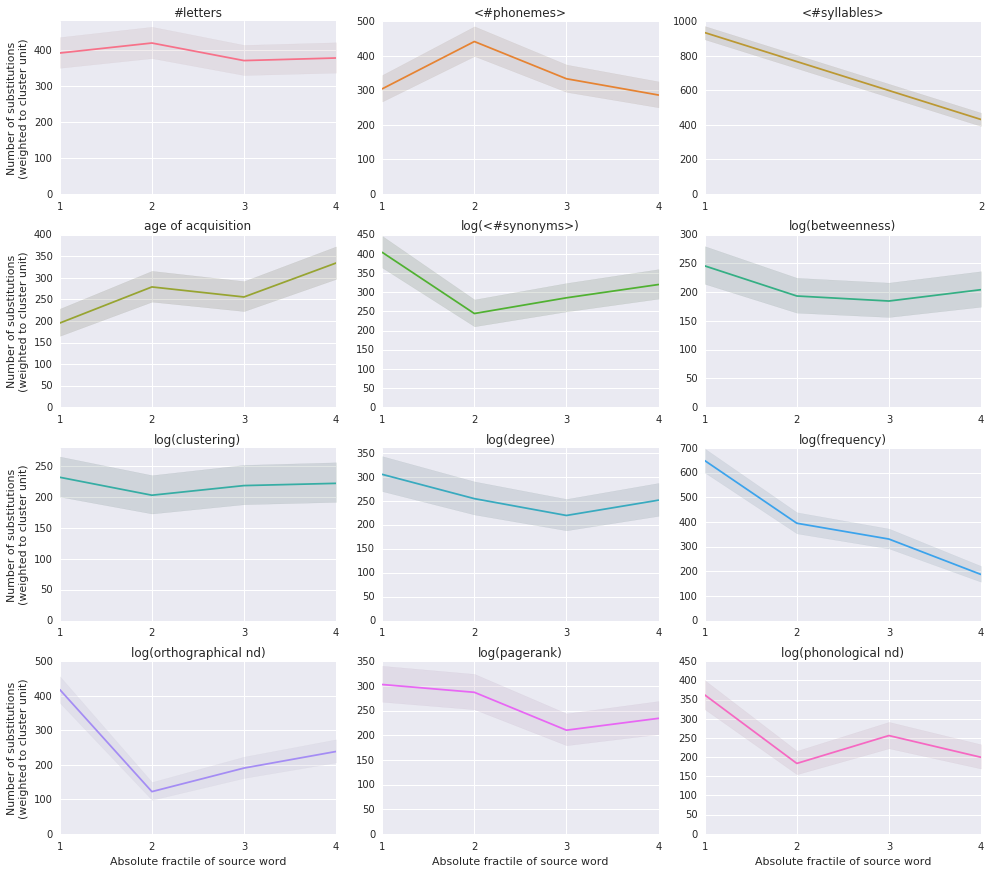

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

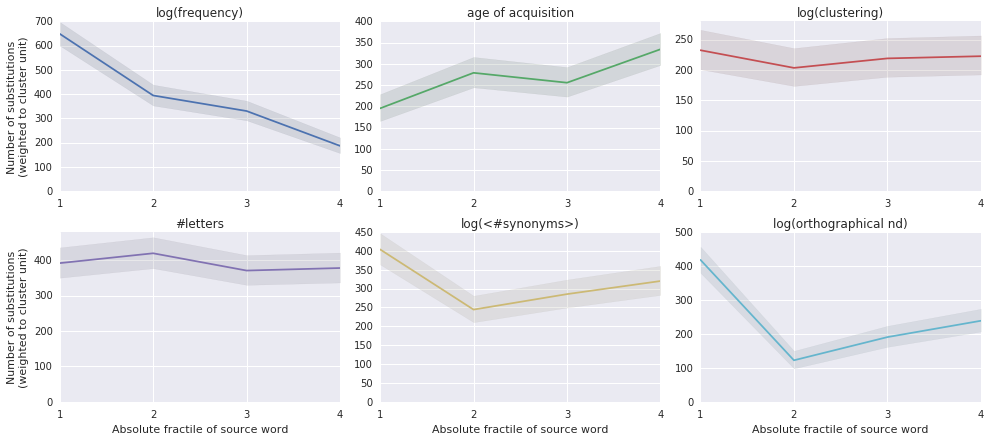

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   89 of 37155) |                    | Elapsed Time: 0:00:01 ETA:  0:07:00

  0% (  170 of 37155) |                    | Elapsed Time: 0:00:02 ETA:  0:07:38

  0% (  251 of 37155) |                    | Elapsed Time: 0:00:03 ETA:  0:07:37

  0% (  331 of 37155) |                    | Elapsed Time: 0:00:04 ETA:  0:07:38

  1% (  410 of 37155) |                    | Elapsed Time: 0:00:05 ETA:  0:07:40

  1% (  465 of 37155) |                    | Elapsed Time: 0:00:05 ETA:  0:07:38

  1% (  555 of 37155) |                    | Elapsed Time: 0:00:06 ETA:  0:07:27

  1% (  639 of 37155) |                    | Elapsed Time: 0:00:07 ETA:  0:07:25

  1% (  727 of 37155) |                    | Elapsed Time: 0:00:08 ETA:  0:07:20

  2% (  818 of 37155) |                    | Elapsed Time: 0:00:09 ETA:  0:07:14

  2% (  909 of 37155) |                    | Elapsed Time: 0:00:10 ETA:  0:07:07

  2% (  929 of 37155) |                    | Elapsed Time: 0:00:10 ETA:  0:07:05

  2% ( 1025 of 37155) |                    | Elapsed Time: 0:00:11 ETA:  0:06:54

  3% ( 1128 of 37155) |                    | Elapsed Time: 0:00:12 ETA:  0:06:39

  3% ( 1237 of 37155) |                    | Elapsed Time: 0:00:14 ETA:  0:06:25

  3% ( 1334 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:06:20

  3% ( 1394 of 37155) |                    | Elapsed Time: 0:00:15 ETA:  0:06:07

  3% ( 1480 of 37155) |                    | Elapsed Time: 0:00:16 ETA:  0:06:07

  4% ( 1557 of 37155) |                    | Elapsed Time: 0:00:17 ETA:  0:06:13

  4% ( 1634 of 37155) |                    | Elapsed Time: 0:00:18 ETA:  0:06:19

  4% ( 1712 of 37155) |                    | Elapsed Time: 0:00:19 ETA:  0:06:24

  4% ( 1790 of 37155) |                    | Elapsed Time: 0:00:20 ETA:  0:06:33

  5% ( 1858 of 37155) |#                   | Elapsed Time: 0:00:21 ETA:  0:06:40

  5% ( 1947 of 37155) |#                   | Elapsed Time: 0:00:22 ETA:  0:06:51

  5% ( 2032 of 37155) |#                   | Elapsed Time: 0:00:23 ETA:  0:06:57

  5% ( 2106 of 37155) |#                   | Elapsed Time: 0:00:24 ETA:  0:07:15

  5% ( 2181 of 37155) |#                   | Elapsed Time: 0:00:25 ETA:  0:07:21

  6% ( 2323 of 37155) |#                   | Elapsed Time: 0:00:26 ETA:  0:06:44

  6% ( 2480 of 37155) |#                   | Elapsed Time: 0:00:27 ETA:  0:05:58

  7% ( 2636 of 37155) |#                   | Elapsed Time: 0:00:28 ETA:  0:05:22

  7% ( 2787 of 37155) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:58

  7% ( 2921 of 37155) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:42

  8% ( 3008 of 37155) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:40

  8% ( 3091 of 37155) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:37

  8% ( 3172 of 37155) |#                   | Elapsed Time: 0:00:33 ETA:  0:04:33

  8% ( 3252 of 37155) |#                   | Elapsed Time: 0:00:34 ETA:  0:04:39

  8% ( 3339 of 37155) |#                   | Elapsed Time: 0:00:35 ETA:  0:04:50

  9% ( 3429 of 37155) |#                   | Elapsed Time: 0:00:36 ETA:  0:05:12

  9% ( 3518 of 37155) |#                   | Elapsed Time: 0:00:37 ETA:  0:05:37

  9% ( 3618 of 37155) |#                   | Elapsed Time: 0:00:38 ETA:  0:06:00

 10% ( 3716 of 37155) |##                  | Elapsed Time: 0:00:39 ETA:  0:06:21

 10% ( 3817 of 37155) |##                  | Elapsed Time: 0:00:40 ETA:  0:06:09

 10% ( 3913 of 37155) |##                  | Elapsed Time: 0:00:41 ETA:  0:06:00

 10% ( 3999 of 37155) |##                  | Elapsed Time: 0:00:42 ETA:  0:06:02

 11% ( 4116 of 37155) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:45

 11% ( 4180 of 37155) |##                  | Elapsed Time: 0:00:43 ETA:  0:05:31

 11% ( 4301 of 37155) |##                  | Elapsed Time: 0:00:44 ETA:  0:05:15

 11% ( 4392 of 37155) |##                  | Elapsed Time: 0:00:45 ETA:  0:05:17

 12% ( 4479 of 37155) |##                  | Elapsed Time: 0:00:46 ETA:  0:05:17

 12% ( 4574 of 37155) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:19

 12% ( 4645 of 37155) |##                  | Elapsed Time: 0:00:48 ETA:  0:05:21

 12% ( 4737 of 37155) |##                  | Elapsed Time: 0:00:49 ETA:  0:05:22

 13% ( 4833 of 37155) |##                  | Elapsed Time: 0:00:50 ETA:  0:05:17

 13% ( 4929 of 37155) |##                  | Elapsed Time: 0:00:51 ETA:  0:05:26

 13% ( 5023 of 37155) |##                  | Elapsed Time: 0:00:52 ETA:  0:05:36

 13% ( 5109 of 37155) |##                  | Elapsed Time: 0:00:53 ETA:  0:05:48

 14% ( 5202 of 37155) |##                  | Elapsed Time: 0:00:54 ETA:  0:05:46

 14% ( 5296 of 37155) |##                  | Elapsed Time: 0:00:55 ETA:  0:05:42

 14% ( 5388 of 37155) |##                  | Elapsed Time: 0:00:56 ETA:  0:05:43

 14% ( 5481 of 37155) |##                  | Elapsed Time: 0:00:57 ETA:  0:05:41

 15% ( 5574 of 37155) |###                 | Elapsed Time: 0:00:58 ETA:  0:05:39

 15% ( 5665 of 37155) |###                 | Elapsed Time: 0:00:59 ETA:  0:05:41

 15% ( 5756 of 37155) |###                 | Elapsed Time: 0:01:00 ETA:  0:05:42

 15% ( 5849 of 37155) |###                 | Elapsed Time: 0:01:01 ETA:  0:05:42

 15% ( 5941 of 37155) |###                 | Elapsed Time: 0:01:02 ETA:  0:05:42

 16% ( 6038 of 37155) |###                 | Elapsed Time: 0:01:03 ETA:  0:05:42

 16% ( 6131 of 37155) |###                 | Elapsed Time: 0:01:04 ETA:  0:05:40

 16% ( 6235 of 37155) |###                 | Elapsed Time: 0:01:05 ETA:  0:05:33

 17% ( 6341 of 37155) |###                 | Elapsed Time: 0:01:06 ETA:  0:05:25

 17% ( 6445 of 37155) |###                 | Elapsed Time: 0:01:07 ETA:  0:05:18

 17% ( 6503 of 37155) |###                 | Elapsed Time: 0:01:08 ETA:  0:05:12

 17% ( 6599 of 37155) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:09

 18% ( 6698 of 37155) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:05

 18% ( 6796 of 37155) |###                 | Elapsed Time: 0:01:11 ETA:  0:05:01

 18% ( 6891 of 37155) |###                 | Elapsed Time: 0:01:12 ETA:  0:05:02

 18% ( 6967 of 37155) |###                 | Elapsed Time: 0:01:13 ETA:  0:05:00

 19% ( 7065 of 37155) |###                 | Elapsed Time: 0:01:14 ETA:  0:05:02

 19% ( 7159 of 37155) |###                 | Elapsed Time: 0:01:15 ETA:  0:05:06

 19% ( 7260 of 37155) |###                 | Elapsed Time: 0:01:16 ETA:  0:05:07

 19% ( 7359 of 37155) |###                 | Elapsed Time: 0:01:17 ETA:  0:05:07

 20% ( 7431 of 37155) |####                | Elapsed Time: 0:01:18 ETA:  0:05:06

 20% ( 7530 of 37155) |####                | Elapsed Time: 0:01:19 ETA:  0:05:05

 20% ( 7629 of 37155) |####                | Elapsed Time: 0:01:20 ETA:  0:05:04

 20% ( 7728 of 37155) |####                | Elapsed Time: 0:01:21 ETA:  0:05:01

 21% ( 7826 of 37155) |####                | Elapsed Time: 0:01:22 ETA:  0:04:58

 21% ( 7896 of 37155) |####                | Elapsed Time: 0:01:22 ETA:  0:04:57

 21% ( 7996 of 37155) |####                | Elapsed Time: 0:01:23 ETA:  0:04:53

 21% ( 8096 of 37155) |####                | Elapsed Time: 0:01:24 ETA:  0:04:53

 22% ( 8198 of 37155) |####                | Elapsed Time: 0:01:25 ETA:  0:04:50

 22% ( 8299 of 37155) |####                | Elapsed Time: 0:01:26 ETA:  0:04:47

 22% ( 8360 of 37155) |####                | Elapsed Time: 0:01:27 ETA:  0:04:45

 22% ( 8461 of 37155) |####                | Elapsed Time: 0:01:28 ETA:  0:04:43

 23% ( 8556 of 37155) |####                | Elapsed Time: 0:01:29 ETA:  0:04:44

 23% ( 8659 of 37155) |####                | Elapsed Time: 0:01:30 ETA:  0:04:41

 23% ( 8759 of 37155) |####                | Elapsed Time: 0:01:31 ETA:  0:04:40

 23% ( 8825 of 37155) |####                | Elapsed Time: 0:01:32 ETA:  0:04:41

 24% ( 8923 of 37155) |####                | Elapsed Time: 0:01:33 ETA:  0:04:40

 24% ( 9017 of 37155) |####                | Elapsed Time: 0:01:34 ETA:  0:04:43

 24% ( 9100 of 37155) |####                | Elapsed Time: 0:01:35 ETA:  0:04:50

 24% ( 9182 of 37155) |####                | Elapsed Time: 0:01:36 ETA:  0:04:58

 24% ( 9263 of 37155) |####                | Elapsed Time: 0:01:37 ETA:  0:05:07

 25% ( 9289 of 37155) |#####               | Elapsed Time: 0:01:37 ETA:  0:05:11

 25% ( 9382 of 37155) |#####               | Elapsed Time: 0:01:38 ETA:  0:05:15

 25% ( 9475 of 37155) |#####               | Elapsed Time: 0:01:39 ETA:  0:05:18

 25% ( 9558 of 37155) |#####               | Elapsed Time: 0:01:40 ETA:  0:05:24

 25% ( 9634 of 37155) |#####               | Elapsed Time: 0:01:41 ETA:  0:05:36

 26% ( 9685 of 37155) |#####               | Elapsed Time: 0:01:43 ETA:  0:07:19

 26% ( 9754 of 37155) |#####               | Elapsed Time: 0:01:44 ETA:  0:07:25

 26% ( 9830 of 37155) |#####               | Elapsed Time: 0:01:45 ETA:  0:07:29

 26% ( 9925 of 37155) |#####               | Elapsed Time: 0:01:46 ETA:  0:07:16

 26% (10027 of 37155) |#####               | Elapsed Time: 0:01:47 ETA:  0:06:53

 27% (10131 of 37155) |#####               | Elapsed Time: 0:01:48 ETA:  0:06:44

 27% (10218 of 37155) |#####               | Elapsed Time: 0:01:49 ETA:  0:06:40

 27% (10321 of 37155) |#####               | Elapsed Time: 0:01:50 ETA:  0:06:25

 28% (10424 of 37155) |#####               | Elapsed Time: 0:01:51 ETA:  0:06:07

 28% (10513 of 37155) |#####               | Elapsed Time: 0:01:52 ETA:  0:04:43

 28% (10587 of 37155) |#####               | Elapsed Time: 0:01:53 ETA:  0:04:43

 28% (10683 of 37155) |#####               | Elapsed Time: 0:01:54 ETA:  0:04:27

 29% (10812 of 37155) |#####               | Elapsed Time: 0:01:55 ETA:  0:04:11

 29% (10914 of 37155) |#####               | Elapsed Time: 0:01:56 ETA:  0:04:10

 29% (10993 of 37155) |#####               | Elapsed Time: 0:01:57 ETA:  0:04:20

 29% (11092 of 37155) |#####               | Elapsed Time: 0:01:58 ETA:  0:04:20

 30% (11147 of 37155) |######              | Elapsed Time: 0:01:59 ETA:  0:04:21

 30% (11246 of 37155) |######              | Elapsed Time: 0:02:00 ETA:  0:04:22

 30% (11338 of 37155) |######              | Elapsed Time: 0:02:01 ETA:  0:04:19

 30% (11457 of 37155) |######              | Elapsed Time: 0:02:02 ETA:  0:03:59

 31% (11611 of 37155) |######              | Elapsed Time: 0:02:03 ETA:  0:03:58

 31% (11740 of 37155) |######              | Elapsed Time: 0:02:04 ETA:  0:03:45

 31% (11866 of 37155) |######              | Elapsed Time: 0:02:05 ETA:  0:03:25

 32% (11991 of 37155) |######              | Elapsed Time: 0:02:06 ETA:  0:03:14

 32% (12076 of 37155) |######              | Elapsed Time: 0:02:07 ETA:  0:03:06

 32% (12161 of 37155) |######              | Elapsed Time: 0:02:08 ETA:  0:03:10

 32% (12244 of 37155) |######              | Elapsed Time: 0:02:09 ETA:  0:03:12

 33% (12329 of 37155) |######              | Elapsed Time: 0:02:10 ETA:  0:03:24

 33% (12416 of 37155) |######              | Elapsed Time: 0:02:11 ETA:  0:03:40

 33% (12540 of 37155) |######              | Elapsed Time: 0:02:12 ETA:  0:03:52

 34% (12639 of 37155) |######              | Elapsed Time: 0:02:13 ETA:  0:04:04

 34% (12753 of 37155) |######              | Elapsed Time: 0:02:14 ETA:  0:04:09

 34% (12865 of 37155) |######              | Elapsed Time: 0:02:15 ETA:  0:04:12

 34% (12978 of 37155) |######              | Elapsed Time: 0:02:16 ETA:  0:03:58

 35% (13005 of 37155) |#######             | Elapsed Time: 0:02:16 ETA:  0:03:47

 35% (13094 of 37155) |#######             | Elapsed Time: 0:02:17 ETA:  0:03:44

 35% (13182 of 37155) |#######             | Elapsed Time: 0:02:18 ETA:  0:03:43

 35% (13279 of 37155) |#######             | Elapsed Time: 0:02:19 ETA:  0:03:46

 35% (13359 of 37155) |#######             | Elapsed Time: 0:02:20 ETA:  0:03:54

 36% (13469 of 37155) |#######             | Elapsed Time: 0:02:21 ETA:  0:03:57

 36% (13609 of 37155) |#######             | Elapsed Time: 0:02:22 ETA:  0:03:42

 36% (13738 of 37155) |#######             | Elapsed Time: 0:02:23 ETA:  0:03:33

 37% (13828 of 37155) |#######             | Elapsed Time: 0:02:24 ETA:  0:03:40

 37% (13911 of 37155) |#######             | Elapsed Time: 0:02:25 ETA:  0:03:41

 37% (13934 of 37155) |#######             | Elapsed Time: 0:02:25 ETA:  0:03:33

 37% (14047 of 37155) |#######             | Elapsed Time: 0:02:26 ETA:  0:03:25

 38% (14155 of 37155) |#######             | Elapsed Time: 0:02:27 ETA:  0:03:12

 38% (14234 of 37155) |#######             | Elapsed Time: 0:02:28 ETA:  0:03:22

 38% (14313 of 37155) |#######             | Elapsed Time: 0:02:29 ETA:  0:03:33

 38% (14398 of 37155) |#######             | Elapsed Time: 0:02:30 ETA:  0:04:22

 38% (14474 of 37155) |#######             | Elapsed Time: 0:02:31 ETA:  0:04:30

 39% (14567 of 37155) |#######             | Elapsed Time: 0:02:32 ETA:  0:04:22

 39% (14662 of 37155) |#######             | Elapsed Time: 0:02:33 ETA:  0:04:20

 39% (14753 of 37155) |#######             | Elapsed Time: 0:02:34 ETA:  0:04:32

 40% (14862 of 37155) |########            | Elapsed Time: 0:02:36 ETA:  0:04:32

 40% (14943 of 37155) |########            | Elapsed Time: 0:02:37 ETA:  0:04:30

 40% (15049 of 37155) |########            | Elapsed Time: 0:02:38 ETA:  0:04:11

 40% (15143 of 37155) |########            | Elapsed Time: 0:02:39 ETA:  0:04:08

 41% (15239 of 37155) |########            | Elapsed Time: 0:02:40 ETA:  0:03:57

 41% (15327 of 37155) |########            | Elapsed Time: 0:02:41 ETA:  0:03:55

 41% (15422 of 37155) |########            | Elapsed Time: 0:02:42 ETA:  0:03:54

 41% (15509 of 37155) |########            | Elapsed Time: 0:02:43 ETA:  0:03:55

 41% (15595 of 37155) |########            | Elapsed Time: 0:02:44 ETA:  0:04:01

 42% (15694 of 37155) |########            | Elapsed Time: 0:02:45 ETA:  0:03:56

 42% (15791 of 37155) |########            | Elapsed Time: 0:02:46 ETA:  0:04:03

 42% (15896 of 37155) |########            | Elapsed Time: 0:02:47 ETA:  0:03:55

 43% (15992 of 37155) |########            | Elapsed Time: 0:02:48 ETA:  0:03:54

 43% (16071 of 37155) |########            | Elapsed Time: 0:02:49 ETA:  0:04:02

 43% (16155 of 37155) |########            | Elapsed Time: 0:02:50 ETA:  0:04:07

 43% (16239 of 37155) |########            | Elapsed Time: 0:02:51 ETA:  0:04:07

 43% (16256 of 37155) |########            | Elapsed Time: 0:02:51 ETA:  0:04:06

 43% (16338 of 37155) |########            | Elapsed Time: 0:02:52 ETA:  0:04:16

 44% (16420 of 37155) |########            | Elapsed Time: 0:02:53 ETA:  0:04:13

 44% (16502 of 37155) |########            | Elapsed Time: 0:02:54 ETA:  0:04:16

 44% (16587 of 37155) |########            | Elapsed Time: 0:02:55 ETA:  0:04:27

 45% (16720 of 37155) |#########           | Elapsed Time: 0:02:56 ETA:  0:04:08

 45% (16828 of 37155) |#########           | Elapsed Time: 0:02:57 ETA:  0:03:52

 45% (16939 of 37155) |#########           | Elapsed Time: 0:02:58 ETA:  0:03:36

 45% (17038 of 37155) |#########           | Elapsed Time: 0:02:59 ETA:  0:03:31

 46% (17138 of 37155) |#########           | Elapsed Time: 0:03:00 ETA:  0:03:22

 46% (17185 of 37155) |#########           | Elapsed Time: 0:03:01 ETA:  0:03:15

 46% (17277 of 37155) |#########           | Elapsed Time: 0:03:02 ETA:  0:03:10

 46% (17364 of 37155) |#########           | Elapsed Time: 0:03:03 ETA:  0:03:08

 46% (17448 of 37155) |#########           | Elapsed Time: 0:03:04 ETA:  0:03:20

 47% (17561 of 37155) |#########           | Elapsed Time: 0:03:05 ETA:  0:03:13

 47% (17649 of 37155) |#########           | Elapsed Time: 0:03:06 ETA:  0:03:20

 47% (17734 of 37155) |#########           | Elapsed Time: 0:03:07 ETA:  0:03:32

 47% (17814 of 37155) |#########           | Elapsed Time: 0:03:08 ETA:  0:03:40

 48% (17915 of 37155) |#########           | Elapsed Time: 0:03:09 ETA:  0:03:38

 48% (18010 of 37155) |#########           | Elapsed Time: 0:03:10 ETA:  0:03:35

 48% (18114 of 37155) |#########           | Elapsed Time: 0:03:11 ETA:  0:03:25

 49% (18240 of 37155) |#########           | Elapsed Time: 0:03:12 ETA:  0:03:06

 49% (18363 of 37155) |#########           | Elapsed Time: 0:03:13 ETA:  0:02:49

 49% (18472 of 37155) |#########           | Elapsed Time: 0:03:14 ETA:  0:02:49

 50% (18578 of 37155) |##########          | Elapsed Time: 0:03:15 ETA:  0:02:40

 50% (18665 of 37155) |##########          | Elapsed Time: 0:03:16 ETA:  0:02:37

 50% (18752 of 37155) |##########          | Elapsed Time: 0:03:17 ETA:  0:02:42

 50% (18842 of 37155) |##########          | Elapsed Time: 0:03:18 ETA:  0:02:43

 50% (18941 of 37155) |##########          | Elapsed Time: 0:03:19 ETA:  0:02:47

 51% (19042 of 37155) |##########          | Elapsed Time: 0:03:20 ETA:  0:02:56

 51% (19125 of 37155) |##########          | Elapsed Time: 0:03:21 ETA:  0:03:14

 51% (19210 of 37155) |##########          | Elapsed Time: 0:03:22 ETA:  0:03:27

 51% (19281 of 37155) |##########          | Elapsed Time: 0:03:23 ETA:  0:03:38

 52% (19361 of 37155) |##########          | Elapsed Time: 0:03:24 ETA:  0:03:42

 52% (19463 of 37155) |##########          | Elapsed Time: 0:03:25 ETA:  0:03:33

 52% (19507 of 37155) |##########          | Elapsed Time: 0:03:25 ETA:  0:03:32

 52% (19587 of 37155) |##########          | Elapsed Time: 0:03:26 ETA:  0:03:37

 52% (19671 of 37155) |##########          | Elapsed Time: 0:03:27 ETA:  0:03:44

 53% (19760 of 37155) |##########          | Elapsed Time: 0:03:28 ETA:  0:03:53

 53% (19854 of 37155) |##########          | Elapsed Time: 0:03:29 ETA:  0:03:46

 53% (19948 of 37155) |##########          | Elapsed Time: 0:03:30 ETA:  0:03:39

 53% (19971 of 37155) |##########          | Elapsed Time: 0:03:31 ETA:  0:03:28

 53% (20063 of 37155) |##########          | Elapsed Time: 0:03:32 ETA:  0:03:20

 54% (20154 of 37155) |##########          | Elapsed Time: 0:03:33 ETA:  0:03:26

 54% (20265 of 37155) |##########          | Elapsed Time: 0:03:34 ETA:  0:03:12

 54% (20357 of 37155) |##########          | Elapsed Time: 0:03:35 ETA:  0:03:05

 55% (20436 of 37155) |###########         | Elapsed Time: 0:03:35 ETA:  0:02:56

 55% (20547 of 37155) |###########         | Elapsed Time: 0:03:36 ETA:  0:02:44

 55% (20636 of 37155) |###########         | Elapsed Time: 0:03:37 ETA:  0:02:46

 55% (20704 of 37155) |###########         | Elapsed Time: 0:03:38 ETA:  0:02:58

 55% (20798 of 37155) |###########         | Elapsed Time: 0:03:39 ETA:  0:02:57

 56% (20881 of 37155) |###########         | Elapsed Time: 0:03:40 ETA:  0:03:01

 56% (20900 of 37155) |###########         | Elapsed Time: 0:03:41 ETA:  0:03:00

 56% (20983 of 37155) |###########         | Elapsed Time: 0:03:42 ETA:  0:03:14

 56% (21067 of 37155) |###########         | Elapsed Time: 0:03:43 ETA:  0:03:18

 56% (21150 of 37155) |###########         | Elapsed Time: 0:03:44 ETA:  0:03:26

 57% (21232 of 37155) |###########         | Elapsed Time: 0:03:45 ETA:  0:03:43

 57% (21315 of 37155) |###########         | Elapsed Time: 0:03:46 ETA:  0:03:46

 57% (21365 of 37155) |###########         | Elapsed Time: 0:03:46 ETA:  0:03:33

 57% (21448 of 37155) |###########         | Elapsed Time: 0:03:47 ETA:  0:03:39

 57% (21536 of 37155) |###########         | Elapsed Time: 0:03:48 ETA:  0:03:35

 58% (21619 of 37155) |###########         | Elapsed Time: 0:03:49 ETA:  0:03:36

 58% (21700 of 37155) |###########         | Elapsed Time: 0:03:50 ETA:  0:03:36

 58% (21782 of 37155) |###########         | Elapsed Time: 0:03:51 ETA:  0:03:36

 58% (21829 of 37155) |###########         | Elapsed Time: 0:03:52 ETA:  0:03:25

 59% (21955 of 37155) |###########         | Elapsed Time: 0:03:53 ETA:  0:02:57

 59% (22068 of 37155) |###########         | Elapsed Time: 0:03:54 ETA:  0:02:39

 59% (22165 of 37155) |###########         | Elapsed Time: 0:03:55 ETA:  0:02:36

 59% (22274 of 37155) |###########         | Elapsed Time: 0:03:56 ETA:  0:02:22

 60% (22293 of 37155) |############        | Elapsed Time: 0:03:56 ETA:  0:02:17

 60% (22404 of 37155) |############        | Elapsed Time: 0:03:57 ETA:  0:02:03

 60% (22501 of 37155) |############        | Elapsed Time: 0:03:58 ETA:  0:01:55

 60% (22587 of 37155) |############        | Elapsed Time: 0:03:59 ETA:  0:01:52

 61% (22689 of 37155) |############        | Elapsed Time: 0:04:00 ETA:  0:01:56

 61% (22758 of 37155) |############        | Elapsed Time: 0:04:01 ETA:  0:02:01

 61% (22860 of 37155) |############        | Elapsed Time: 0:04:02 ETA:  0:02:06

 61% (22934 of 37155) |############        | Elapsed Time: 0:04:04 ETA:  0:03:39

 62% (23037 of 37155) |############        | Elapsed Time: 0:04:05 ETA:  0:03:42

 62% (23160 of 37155) |############        | Elapsed Time: 0:04:06 ETA:  0:03:19

 62% (23222 of 37155) |############        | Elapsed Time: 0:04:07 ETA:  0:03:29

 62% (23317 of 37155) |############        | Elapsed Time: 0:04:08 ETA:  0:03:29

 63% (23421 of 37155) |############        | Elapsed Time: 0:04:09 ETA:  0:03:18

 63% (23504 of 37155) |############        | Elapsed Time: 0:04:10 ETA:  0:03:28

 63% (23594 of 37155) |############        | Elapsed Time: 0:04:11 ETA:  0:03:34

 63% (23687 of 37155) |############        | Elapsed Time: 0:04:12 ETA:  0:02:13

 64% (23790 of 37155) |############        | Elapsed Time: 0:04:13 ETA:  0:02:12

 64% (23895 of 37155) |############        | Elapsed Time: 0:04:14 ETA:  0:02:20

 64% (23984 of 37155) |############        | Elapsed Time: 0:04:15 ETA:  0:02:22

 64% (24100 of 37155) |############        | Elapsed Time: 0:04:16 ETA:  0:02:11

 65% (24151 of 37155) |#############       | Elapsed Time: 0:04:17 ETA:  0:02:06

 65% (24254 of 37155) |#############       | Elapsed Time: 0:04:18 ETA:  0:01:55

 65% (24356 of 37155) |#############       | Elapsed Time: 0:04:19 ETA:  0:01:48

 65% (24444 of 37155) |#############       | Elapsed Time: 0:04:20 ETA:  0:01:43

 66% (24569 of 37155) |#############       | Elapsed Time: 0:04:21 ETA:  0:01:33

 66% (24616 of 37155) |#############       | Elapsed Time: 0:04:21 ETA:  0:01:33

 66% (24715 of 37155) |#############       | Elapsed Time: 0:04:22 ETA:  0:01:34

 66% (24808 of 37155) |#############       | Elapsed Time: 0:04:23 ETA:  0:01:31

 67% (24907 of 37155) |#############       | Elapsed Time: 0:04:24 ETA:  0:01:38

 67% (24988 of 37155) |#############       | Elapsed Time: 0:04:25 ETA:  0:01:52

 67% (25080 of 37155) |#############       | Elapsed Time: 0:04:26 ETA:  0:01:48

 67% (25160 of 37155) |#############       | Elapsed Time: 0:04:27 ETA:  0:01:58

 68% (25298 of 37155) |#############       | Elapsed Time: 0:04:28 ETA:  0:01:34

 68% (25391 of 37155) |#############       | Elapsed Time: 0:04:29 ETA:  0:01:47

 68% (25484 of 37155) |#############       | Elapsed Time: 0:04:30 ETA:  0:01:49

 68% (25545 of 37155) |#############       | Elapsed Time: 0:04:31 ETA:  0:01:51

 69% (25645 of 37155) |#############       | Elapsed Time: 0:04:32 ETA:  0:01:47

 69% (25734 of 37155) |#############       | Elapsed Time: 0:04:33 ETA:  0:01:50

 69% (25837 of 37155) |#############       | Elapsed Time: 0:04:34 ETA:  0:01:39

 69% (25947 of 37155) |#############       | Elapsed Time: 0:04:35 ETA:  0:01:38

 70% (26009 of 37155) |##############      | Elapsed Time: 0:04:35 ETA:  0:01:30

 70% (26120 of 37155) |##############      | Elapsed Time: 0:04:36 ETA:  0:01:41

 70% (26234 of 37155) |##############      | Elapsed Time: 0:04:37 ETA:  0:01:30

 70% (26333 of 37155) |##############      | Elapsed Time: 0:04:38 ETA:  0:01:27

 71% (26413 of 37155) |##############      | Elapsed Time: 0:04:39 ETA:  0:01:31

 71% (26473 of 37155) |##############      | Elapsed Time: 0:04:40 ETA:  0:01:38

 71% (26574 of 37155) |##############      | Elapsed Time: 0:04:41 ETA:  0:01:32

 71% (26662 of 37155) |##############      | Elapsed Time: 0:04:42 ETA:  0:01:38

 72% (26754 of 37155) |##############      | Elapsed Time: 0:04:43 ETA:  0:01:45

 72% (26856 of 37155) |##############      | Elapsed Time: 0:04:44 ETA:  0:01:42

 72% (26938 of 37155) |##############      | Elapsed Time: 0:04:45 ETA:  0:01:53

 72% (27059 of 37155) |##############      | Elapsed Time: 0:04:46 ETA:  0:01:48

 73% (27174 of 37155) |##############      | Elapsed Time: 0:04:47 ETA:  0:01:40

 73% (27280 of 37155) |##############      | Elapsed Time: 0:04:48 ETA:  0:01:27

 73% (27368 of 37155) |##############      | Elapsed Time: 0:04:49 ETA:  0:01:24

 73% (27402 of 37155) |##############      | Elapsed Time: 0:04:49 ETA:  0:01:25

 74% (27501 of 37155) |##############      | Elapsed Time: 0:04:50 ETA:  0:01:19

 74% (27603 of 37155) |##############      | Elapsed Time: 0:04:51 ETA:  0:01:13

 74% (27717 of 37155) |##############      | Elapsed Time: 0:04:52 ETA:  0:01:07

 74% (27820 of 37155) |##############      | Elapsed Time: 0:04:53 ETA:  0:00:59

 75% (27867 of 37155) |###############     | Elapsed Time: 0:04:54 ETA:  0:01:08

 75% (27988 of 37155) |###############     | Elapsed Time: 0:04:55 ETA:  0:01:04

 75% (28097 of 37155) |###############     | Elapsed Time: 0:04:56 ETA:  0:01:02

 75% (28204 of 37155) |###############     | Elapsed Time: 0:04:57 ETA:  0:00:53

 76% (28306 of 37155) |###############     | Elapsed Time: 0:04:58 ETA:  0:00:52

 76% (28331 of 37155) |###############     | Elapsed Time: 0:04:58 ETA:  0:00:49

 76% (28439 of 37155) |###############     | Elapsed Time: 0:04:59 ETA:  0:00:46

 76% (28537 of 37155) |###############     | Elapsed Time: 0:05:00 ETA:  0:00:51

 77% (28649 of 37155) |###############     | Elapsed Time: 0:05:01 ETA:  0:00:46

 77% (28745 of 37155) |###############     | Elapsed Time: 0:05:02 ETA:  0:00:47

 77% (28796 of 37155) |###############     | Elapsed Time: 0:05:03 ETA:  0:00:59

 77% (28903 of 37155) |###############     | Elapsed Time: 0:05:04 ETA:  0:00:59

 78% (29014 of 37155) |###############     | Elapsed Time: 0:05:05 ETA:  0:00:56

 78% (29112 of 37155) |###############     | Elapsed Time: 0:05:06 ETA:  0:00:57

 78% (29225 of 37155) |###############     | Elapsed Time: 0:05:07 ETA:  0:00:51

 78% (29260 of 37155) |###############     | Elapsed Time: 0:05:07 ETA:  0:00:54

 79% (29364 of 37155) |###############     | Elapsed Time: 0:05:08 ETA:  0:00:50

 79% (29474 of 37155) |###############     | Elapsed Time: 0:05:09 ETA:  0:00:50

 79% (29560 of 37155) |###############     | Elapsed Time: 0:05:10 ETA:  0:00:53

 79% (29657 of 37155) |###############     | Elapsed Time: 0:05:11 ETA:  0:00:50

 80% (29724 of 37155) |################    | Elapsed Time: 0:05:12 ETA:  0:00:50

 80% (29825 of 37155) |################    | Elapsed Time: 0:05:13 ETA:  0:00:54

 80% (29926 of 37155) |################    | Elapsed Time: 0:05:14 ETA:  0:00:51

 80% (30036 of 37155) |################    | Elapsed Time: 0:05:15 ETA:  0:00:52

 81% (30143 of 37155) |################    | Elapsed Time: 0:05:16 ETA:  0:00:48

 81% (30189 of 37155) |################    | Elapsed Time: 0:05:16 ETA:  0:00:51

 81% (30281 of 37155) |################    | Elapsed Time: 0:05:17 ETA:  0:00:58

 81% (30388 of 37155) |################    | Elapsed Time: 0:05:18 ETA:  0:00:48

 82% (30485 of 37155) |################    | Elapsed Time: 0:05:19 ETA:  0:00:47

 82% (30594 of 37155) |################    | Elapsed Time: 0:05:20 ETA:  0:00:44

 82% (30653 of 37155) |################    | Elapsed Time: 0:05:21 ETA:  0:00:45

 82% (30752 of 37155) |################    | Elapsed Time: 0:05:22 ETA:  0:00:45

 83% (30862 of 37155) |################    | Elapsed Time: 0:05:23 ETA:  0:00:44

 83% (30976 of 37155) |################    | Elapsed Time: 0:05:24 ETA:  0:00:40

 83% (31089 of 37155) |################    | Elapsed Time: 0:05:25 ETA:  0:00:32

 83% (31118 of 37155) |################    | Elapsed Time: 0:05:25 ETA:  0:00:24

 84% (31241 of 37155) |################    | Elapsed Time: 0:05:26 ETA:  0:00:16

 84% (31343 of 37155) |################    | Elapsed Time: 0:05:27 ETA:  0:00:13

 84% (31479 of 37155) |################    | Elapsed Time: 0:05:28 ETA:  0:00:02

 85% (31582 of 37155) |#################   | Elapsed Time: 0:05:29 ETA:  0:00:00

 85% (31693 of 37155) |#################   | Elapsed Time: 0:05:30 ETA:  0:00:00

 85% (31803 of 37155) |#################   | Elapsed Time: 0:05:31 ETA:  0:00:00

 85% (31904 of 37155) |#################   | Elapsed Time: 0:05:32 ETA:  0:00:00

 86% (32001 of 37155) |#################   | Elapsed Time: 0:05:33 ETA:  0:00:05

 86% (32047 of 37155) |#################   | Elapsed Time: 0:05:34 ETA:  0:00:10

 86% (32153 of 37155) |#################   | Elapsed Time: 0:05:35 ETA:  0:00:07

 86% (32258 of 37155) |#################   | Elapsed Time: 0:05:36 ETA:  0:00:19

 87% (32361 of 37155) |#################   | Elapsed Time: 0:05:37 ETA:  0:00:17

 87% (32455 of 37155) |#################   | Elapsed Time: 0:05:38 ETA:  0:00:21

 87% (32511 of 37155) |#################   | Elapsed Time: 0:05:38 ETA:  0:00:21

 87% (32627 of 37155) |#################   | Elapsed Time: 0:05:39 ETA:  0:00:17

 88% (32729 of 37155) |#################   | Elapsed Time: 0:05:40 ETA:  0:00:16

 88% (32841 of 37155) |#################   | Elapsed Time: 0:05:41 ETA:  0:00:08

 88% (32976 of 37155) |#################   | Elapsed Time: 0:05:42 ETA:  0:00:00

 89% (33076 of 37155) |#################   | Elapsed Time: 0:05:43 ETA:  0:00:00

 89% (33170 of 37155) |#################   | Elapsed Time: 0:05:44 ETA:  0:00:03

 89% (33270 of 37155) |#################   | Elapsed Time: 0:05:45 ETA:  0:00:00

 89% (33383 of 37155) |#################   | Elapsed Time: 0:05:46 ETA:  0:00:00

 90% (33440 of 37155) |##################  | Elapsed Time: 0:05:47 ETA:  0:00:03

 90% (33538 of 37155) |##################  | Elapsed Time: 0:05:48 ETA:  0:00:03

 90% (33648 of 37155) |##################  | Elapsed Time: 0:05:49 ETA:  0:00:03

 90% (33747 of 37155) |##################  | Elapsed Time: 0:05:50 ETA:  0:00:16

 91% (33843 of 37155) |##################  | Elapsed Time: 0:05:51 ETA:  0:00:17

 91% (33904 of 37155) |##################  | Elapsed Time: 0:05:52 ETA:  0:00:18

 91% (33987 of 37155) |##################  | Elapsed Time: 0:05:53 ETA:  0:00:22

 91% (34094 of 37155) |##################  | Elapsed Time: 0:05:54 ETA:  0:00:18

 92% (34195 of 37155) |##################  | Elapsed Time: 0:05:55 ETA:  0:00:22

 92% (34311 of 37155) |##################  | Elapsed Time: 0:05:56 ETA:  0:00:14

 92% (34369 of 37155) |##################  | Elapsed Time: 0:05:56 ETA:  0:00:13

 92% (34471 of 37155) |##################  | Elapsed Time: 0:05:57 ETA:  0:00:15

 93% (34579 of 37155) |##################  | Elapsed Time: 0:05:58 ETA:  0:00:10

 93% (34699 of 37155) |##################  | Elapsed Time: 0:05:59 ETA:  0:00:00

 93% (34793 of 37155) |##################  | Elapsed Time: 0:06:00 ETA:  0:00:00

 93% (34833 of 37155) |##################  | Elapsed Time: 0:06:01 ETA:  0:00:00

 94% (34944 of 37155) |##################  | Elapsed Time: 0:06:02 ETA:  0:00:00

 94% (35045 of 37155) |##################  | Elapsed Time: 0:06:03 ETA:  0:00:00

 94% (35151 of 37155) |##################  | Elapsed Time: 0:06:04 ETA:  0:00:00

 95% (35298 of 37155) |################### | Elapsed Time: 0:06:05 ETA:  0:00:00

 95% (35396 of 37155) |################### | Elapsed Time: 0:06:06 ETA:  0:00:00

 95% (35505 of 37155) |################### | Elapsed Time: 0:06:07 ETA:  0:00:00

 95% (35610 of 37155) |################### | Elapsed Time: 0:06:08 ETA:  0:00:00

 96% (35712 of 37155) |################### | Elapsed Time: 0:06:09 ETA:  0:00:00

 96% (35762 of 37155) |################### | Elapsed Time: 0:06:09 ETA:  0:00:00

 96% (35866 of 37155) |################### | Elapsed Time: 0:06:10 ETA:  0:00:00

 96% (35974 of 37155) |################### | Elapsed Time: 0:06:11 ETA:  0:00:00

 97% (36079 of 37155) |################### | Elapsed Time: 0:06:12 ETA:  0:00:00

 97% (36177 of 37155) |################### | Elapsed Time: 0:06:13 ETA:  0:00:00

 97% (36227 of 37155) |################### | Elapsed Time: 0:06:14 ETA:  0:00:00

 97% (36338 of 37155) |################### | Elapsed Time: 0:06:15 ETA:  0:00:00

 98% (36440 of 37155) |################### | Elapsed Time: 0:06:16 ETA:  0:00:00

 98% (36547 of 37155) |################### | Elapsed Time: 0:06:17 ETA:  0:00:00

 98% (36654 of 37155) |################### | Elapsed Time: 0:06:18 ETA:  0:00:00

 98% (36691 of 37155) |################### | Elapsed Time: 0:06:18 ETA:  0:00:00

 99% (36797 of 37155) |################### | Elapsed Time: 0:06:19 ETA:  0:00:00

 99% (36893 of 37155) |################### | Elapsed Time: 0:06:20 ETA:  0:00:00

 99% (37000 of 37155) |################### | Elapsed Time: 0:06:21 ETA:  0:00:00

 99% (37110 of 37155) |################### | Elapsed Time: 0:06:22 ETA:  0:00:00

100% (37155 of 37155) |####################| Elapsed Time: 0:06:23 Time: 0:06:23


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

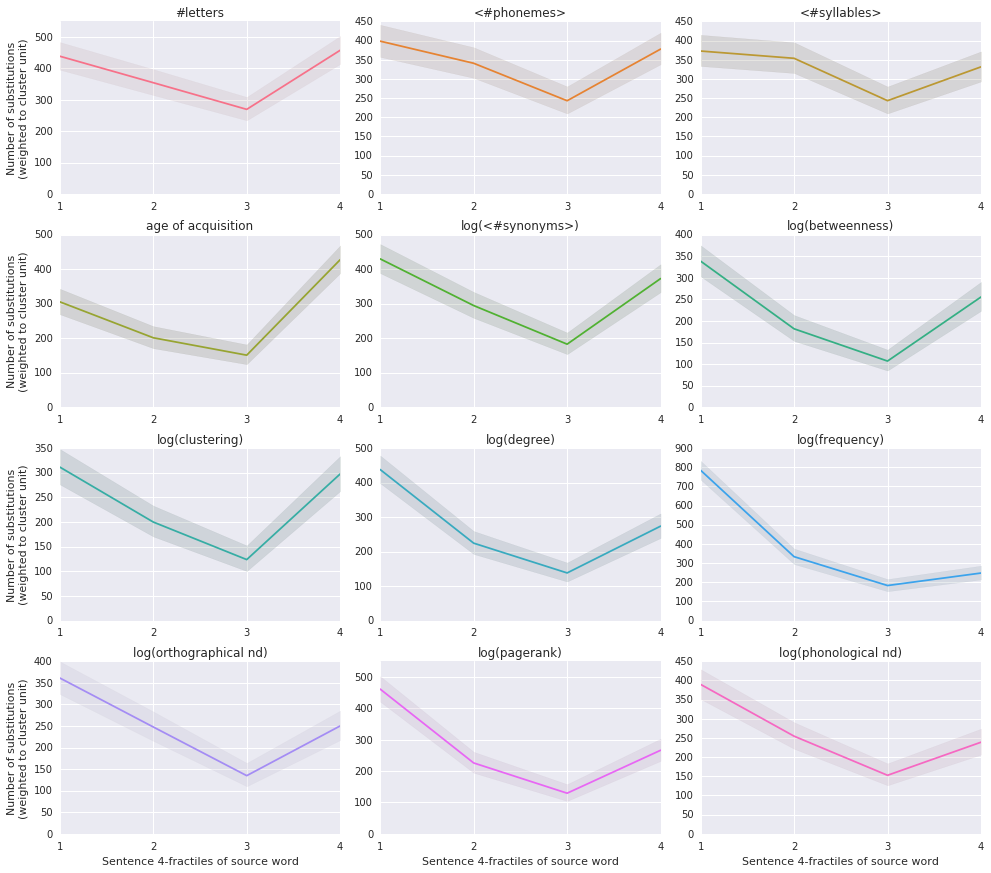

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

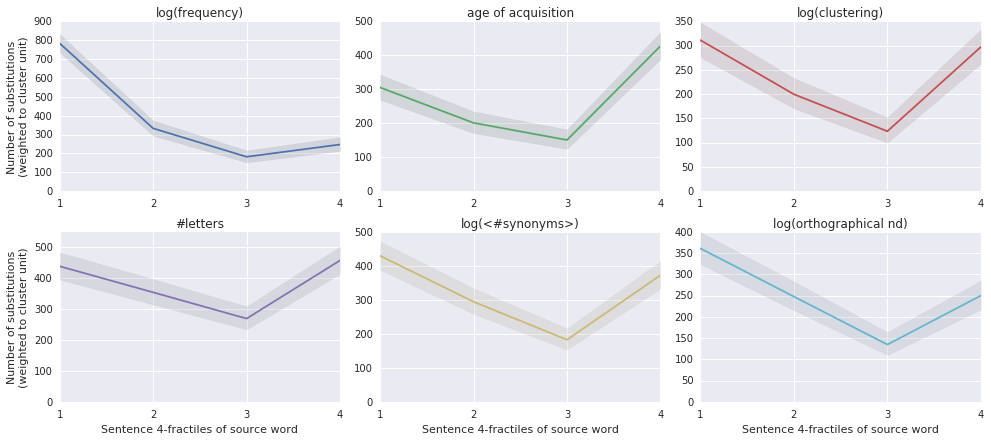

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)